# Data Mining Course Spark Exercise
## Sharif University of Technology

In this notebook we are going to analyze farsi news. 
Outline of the exercise:
* Dataset preparation
* Preprocessing 
* Exploration 
* Word Collections

You should replace the `TODO` parts with your implementation. Remeber that each `TODO` may take multiple lines and you shouldn't limit your self to one-line codes.

## Prerequisites
You should be faimilar with [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). In this notebook you should use the following formula for tf-idf:
$$f_{t,d}/len(d) \times log(1 + \frac{N}{n_t})$$

## Warning: RDD api only
You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).

# Please enter your name below:
# Name: Amirashkan Chavoshi
# Student Number: 98101374

# Section 1: Dataset prepartition
This section you need to download [dataset](https://drive.google.com/file/d/1bRxHQDzPr6wDimbM7b89H47kH8O3YV8Y/view?usp=sharing) in a directory you work. After that run the below cell to untar the datase.

**Note 1: Don't change the below command.**

**Note 2: If you use Windows OS, unzip the dataset manually.**

## Install Pypark & Initialization
Uncomment this section if you use google colab or local pc

In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession \
    .builder \
    .appName("HW1") \
    .master("local[6]") \
    .getOrCreate()

sc:SparkContext=spark.sparkContext

23/12/20 01:39:36 WARN Utils: Your hostname, aac resolves to a loopback address: 127.0.1.1; using 172.27.171.205 instead (on interface wlp2s0)
23/12/20 01:39:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/20 01:39:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Reading the data

In [3]:
news_rdd = sc.textFile("news_data.jsonl")

# Section 2: Preprocessing
This section we try to normalize news and remove useless characters (for example /n and /u200c and ...). Also find and remove stop words.

In [4]:
import json

json_rdd = news_rdd.map(lambda x: json.loads(x)) \
# .sample(False, 1/3)
# Uncomment the line above to filter the news (rdeuce amount of data). 


In [5]:
import re
def remove_useless_characters(x):
    # useless_charaters = r'[[a-zA-Z]!@#$%^&*()،.؟":{}|<>1234567890\n\u200c۱۲۳۴۵۶۷۸۹۰]'
    x['body'] = re.sub(r'[^آ-ی ]', "", x['body'])
    return x

# Remove useless characters.
clean_news_rdd = json_rdd.map(lambda x: remove_useless_characters(x)) #TODO: remove useless charachters


In [6]:
def remove_stop_words(x):
    stop_words = ["اعلام", "انحام", "قرار", "مورد", "باید", "دارد", "میشود", "کرده", "خواهد", "داد", "دو", "و", "کرد", "شده", "گفت", "در", "به", "از", "که", "این", "را", "با", "های", "برای", "تا", "ها", "است", "یا", "اما", "هم", "نه", "یک",
    "خود", "یکی", "بود", "شد", "می", "شود", "کرد", "او", "ما", "شما", "آن", "آنها", "ایشان", "با", "در", "بر", "برای",
    "به", "روی", "زیر", "بالا", "جلوی", "پشت", "پنجره", "دنبال", "جلو", "پیش", "پس", "نزدیک", "دور", "برخی", "چند",
    "چنین", "چه", "چون", "چگونه", "کجا", "کدام", "که", "کدامین", "کدامیک", "کدامیکی", "کجا", "کی", "چرا", "چطور", "چندین",
    "چند", "چنین", "کسی", "کس", "کدامیک", "کدامین", "کدامیکی", "کدام", "اینکه", "آنکه", "ولی", "اما", "اگر", "هر", "هرکس",
    "هرچه", "همان", "تنها", "وقتی", "تا", "تازه", "الان", "همیشه", "هنوز", "همین", "اول", "حالا", "پیش", "پس", "بار",
    "بارها", "همچنین", "نه", "نیز", "بلکه", "بله", "بلکه", "بلکه", "آره", "آری", "آره", "آری", "آره", "آری", "آره",
    "آری", "هم", "دیگر", "هم", "دیگران", "دیگری", "دیگه", "دیگه", "دیگران", "دیگری", "جلو", "پیش", "پس", "بالا", "پایین"]
    x['body'] = " ".join([word for word in x['body'].split() if word not in stop_words])
    return x
processed_news_rdd = clean_news_rdd.map(lambda x: remove_stop_words(x)) # Find and remove stopwords.


# Section 3: Exploration
Please answer the following questions regarding the dataset:
- what are the titles and urls of 5 longest news?
- what are the 20 most frequent words? (Plot the distribution of these words)
- find the `word clouds` of the news.
    - you need to use `keywords` field.
    - score = $2^{log_{10}(count)}$ ( count is the number of the each keyword)
    - you should normalize scores.
    - use ***wordcloud*** package for showing the result.
- plot a timeline which shows total count of news per each day.
- plot a timeline which shows total count of news per each day that have at least one of the word clouds.
- what is your inference about the below timeline.

In [14]:
# Titles and URLs of 5 longest news
def convert_to_json(x):
    new_obj = {'length': x[0], 'title': x[1][0], 'url': x[1][1]}
    return new_obj
longest_news_rdd1 = processed_news_rdd.map(lambda x:  (len(x['body']), (x['title'], x['url']))).sortByKey(ascending=False)
longest_news_rdd2 = longest_news_rdd1.map(convert_to_json)
longest_news_rdd2.take(10)

[{'length': 28774,
  'title': 'دوردوم سفر رئیس جمهور به فارس/حضور رئیس جمهور در یادروز حافظ',
  'url': 'https://www.mehrnews.com/news/5909488/دوردوم-سفر-رئیس-جمهور-به-فارس-حضور-رئیس-جمهور-در-یادروز-حافظ'},
 {'length': 28774,
  'title': 'دوردوم سفر رئیس جمهور به فارس/حضور رئیس جمهور در یادروز حافظ',
  'url': 'https://www.mehrnews.com/news/5909488/دوردوم-سفر-رئیس-جمهور-به-فارس-حضور-رئیس-جمهور-در-یادروز-حافظ'},
 {'length': 28589,
  'title': 'یک کامیون مهمات عراقی به دست نیروهای خودی افتاد',
  'url': 'https://www.mehrnews.com/news/5905740/یک-کامیون-مهمات-عراقی-به-دست-نیروهای-خودی-افتاد'},
 {'length': 28586,
  'title': 'خبرگزاری فارس - نمایندگان مجلس به ۱7 وزیر از 19 وزیر در هفته گذشته تذکر دادند',
  'url': 'https://www.farsnews.ir/news/14020806000146/نمایندگان-مجلس-به-۱-وزیر-از-9-وزیر-در-هفته-گذشته-تذکر-دادند'},
 {'length': 28581,
  'title': 'ششمین روز محاکمه دژخیم حمید نوری در دادگاه دورس آلبانی - ادای شهادت حسین فارسی - چهار\u200cشنبه ۲۶آبان ',
  'url': 'https://news.mojahedin.org/id/978

In [15]:
# Find the 20 most frequent words
news_words_rdd = processed_news_rdd.flatMap(lambda x: x['body'].split(" ")) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x + y) \
.map(lambda x: (x[1], x[0])) \
.sortByKey(ascending=False)
top_twenty_news_words_rdd = sc.parallelize(news_words_rdd.take(20))
top_twenty_news_words_rdd.collect()

[(669355, 'ایران'),
 (640182, 'سال'),
 (579215, 'کشور'),
 (503073, 'گزارش'),
 (455979, 'استان'),
 (429515, 'ادامه'),
 (413148, 'روز'),
 (395399, 'هزار'),
 (392829, 'مردم'),
 (362061, 'غزه'),
 (357679, 'اسلامی'),
 (355982, 'انجام'),
 (349122, 'رژیم'),
 (342500, 'تیم'),
 (333299, 'کار'),
 (328452, 'سازمان'),
 (300476, 'امروز'),
 (294335, 'ملی'),
 (291756, 'عنوان'),
 (288358, 'کند')]

/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


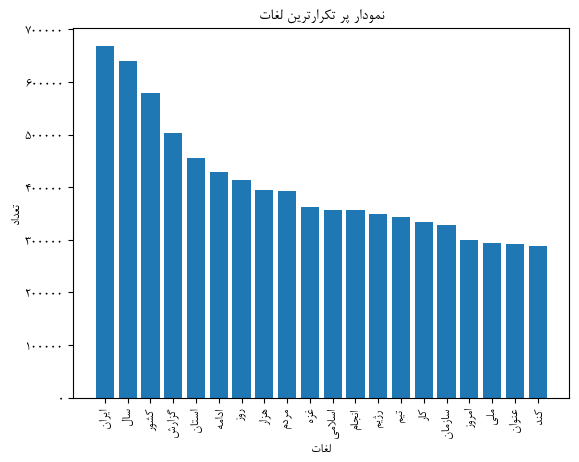

In [16]:
# Plot the results of previous cell using matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import arabic_reshaper
from bidi.algorithm import get_display
font_path = '/home/aac/Desktop/HW1/B-NAZANIN.TTF'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'B Nazanin'
# Use the font file in Matplotlib
def prepare_arabic_text(text):
    return get_display(arabic_reshaper.reshape(u'%s' % str(text)))

numbers = top_twenty_news_words_rdd.map(lambda tup: tup[0]).collect()

words = top_twenty_news_words_rdd.map(lambda tup: tup[1]).collect()
words = [prepare_arabic_text(word) for word in words]

# Plot the bar chart using Matplotlib
plt.bar(words, numbers)
plt.xlabel(prepare_arabic_text('لغات'))
plt.xticks(rotation=90)
plt.ylabel(prepare_arabic_text('تعداد'))
plt.title(prepare_arabic_text('نمودار پر تکرارترین لغات'))
plt.show()

In [19]:
# Find score of each keyword
import math
def custom_keywords_flat_map(x):
    if "keywords" in x:
        return x['keywords']
    else:
        return []
keywords_rdd = processed_news_rdd.flatMap(custom_keywords_flat_map) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x + y) \
.map(lambda x: (x[1], x[0])) \
.map(lambda x: (2**(math.log10(x[0])), x[1])) \
.sortByKey(ascending=False)

maximum_score = keywords_rdd.take(1)[0][0]
normalized_keywords_rdd = keywords_rdd.map(lambda x: (x[0]/maximum_score, x[1])) 


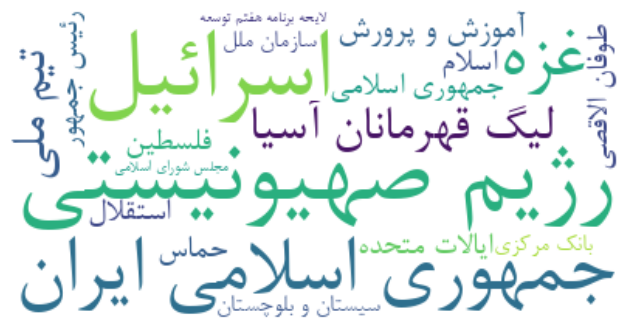

In [21]:
# Plot scores using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path = '/home/aac/Desktop/HW1/B-NAZANIN.TTF'

word_score_dict = {tup[1]: tup[0] for tup in normalized_keywords_rdd.take(20)}

wordcloud = WordCloud(font_path=font_path, background_color='white').generate_from_frequencies(word_score_dict)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

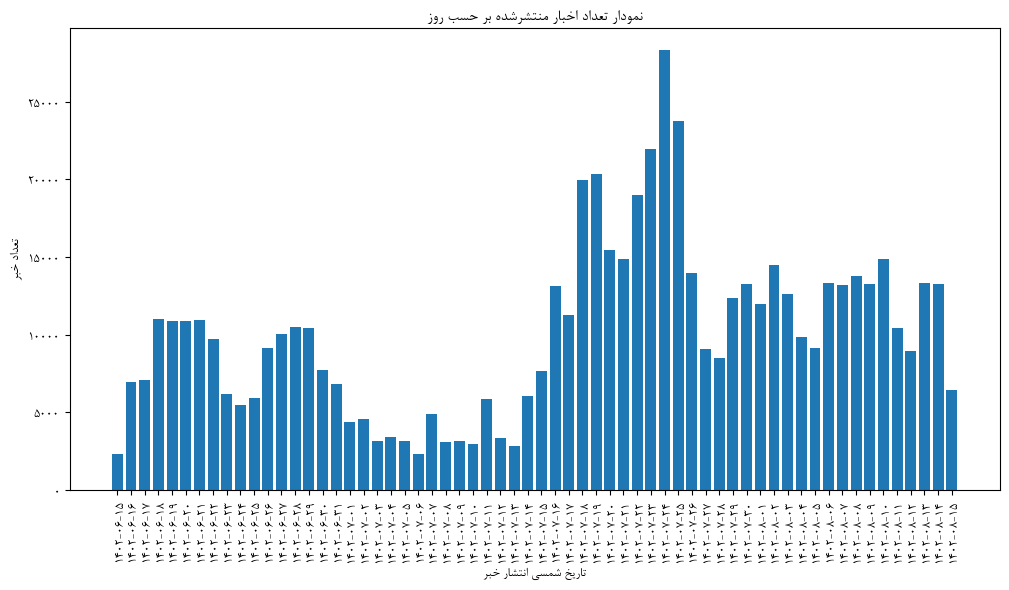

In [39]:
# Plot a timeline which shows total count of news per each day.
from datetime import datetime
import matplotlib.pyplot as plt
from khayyam import JalaliDatetime

def filter_documents(x):
    if "date_published" in x:
        return True
    else:
        return False

def timestamp_to_persian_date(timestamp):
    persian_datetime = JalaliDatetime.fromtimestamp(float(timestamp))
    return persian_datetime.strftime('%Y-%m-%d')

news_published_dates_rdd = processed_news_rdd.filter(filter_documents) \
.map(lambda x: x['date_published']) \
.map(lambda x: timestamp_to_persian_date(x)) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x+y) \
.sortByKey(lambda x: x[0])

published_news_count = news_published_dates_rdd.map(lambda tup: tup[1]).collect()
dates = news_published_dates_rdd.map(lambda tup: tup[0]).collect()
plt.figure(figsize=(12, 6))
plt.title(prepare_arabic_text("نمودار تعداد اخبار منتشر‌شده بر حسب روز"))
plt.xlabel(prepare_arabic_text(("تاریخ شمسی انتشار خبر")))
plt.ylabel(prepare_arabic_text(("تعداد خبر")))
plt.bar(dates, published_news_count, width=0.8)
plt.xticks(rotation=90)
plt.show()



/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


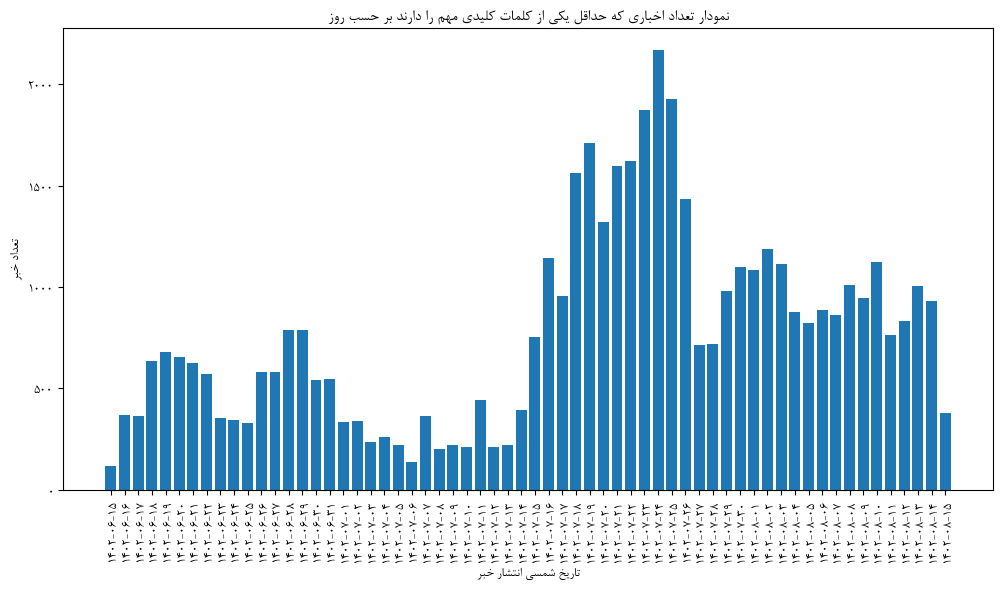

In [40]:
# Plot a timeline which shows total count of news per each day that have at least one of the word clouds.
from khayyam import JalaliDatetime
from matplotlib import font_manager

list_of_words_in_wordcloud = [word[1] for word in normalized_keywords_rdd.take(100)]
def check_keyword_in_wordcloud(x):
    if "keywords" in x:
        keywords = x['keywords']
        for keyword in keywords:
            if keyword in list_of_words_in_wordcloud:
                return True
            else:
                return False
    else:
        return False

processed_news_contain_wordcloud_rdd = processed_news_rdd.filter(check_keyword_in_wordcloud) \
.map(lambda x: x['date_published']) \
.map(lambda x: (x, 1)) \
.map(lambda x: timestamp_to_persian_date(x[0])) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x+y) \
.sortByKey()
published_wordcloud_news_count = processed_news_contain_wordcloud_rdd.map(lambda tup: tup[1]).collect()
dates = processed_news_contain_wordcloud_rdd.map(lambda tup: tup[0]).collect()

plt.figure(figsize=(12, 6))
plt.title(prepare_arabic_text("نمودار تعداد اخباری که حداقل یکی از کلمات کلیدی مهم را دارند بر حسب روز"))
plt.xlabel(prepare_arabic_text("تاریخ شمسی انتشار خبر"))
plt.ylabel(prepare_arabic_text("تعداد خبر"))
plt.bar(dates, published_wordcloud_news_count, width=0.8)
plt.xticks(rotation=90)
plt.show()

# Section 4: Son, A-prior algorithm
- In this section we want to find 3-sets words collections that appear together the most.
    - What is your idea to solve the problem?
    - Implement an algorithm for doing so.
    - What is the most pertinant 3-sets words?
- Now we want to test the results and know that how valid is the model.
    - How we can test the model?
    - Explain and implement a scenario to test the model with using `tf-idf`.

In [7]:
# Find 3-sets words collections that appear together most
from itertools import combinations

def find_term_frequency_for_one_document(x):
    words = x['body'].split(" ")
    id = x['uid']
    return [((word, id), 1/len(words)) for word in words]

def process_group(group):
    key, values = group
    result = list(values) 
    return result

def sort_tfs_and_generate_triples(x):
    sorted_tuples = sorted(x, key=lambda x: x[1][1], reverse=True)
    temp =  sorted_tuples[:5] # This number is very important and shows how many words should choose from each document
    words = [word[1][0] for word in temp]
    return list(combinations(words, 3))

triple_frequent_body_words = processed_news_rdd.flatMap(find_term_frequency_for_one_document) \
.reduceByKey(lambda x, y: x+y) \
.map(lambda x: (x[0][1], (x[0][0], x[1]))) \
.groupBy(lambda x: x[0]) \
.map(process_group) \
.flatMap(sort_tfs_and_generate_triples) \
.map(lambda x: (tuple(sorted(x)), 1)) \
.reduceByKey(lambda x, y: x + y) \
.sortBy(lambda x: x[1], ascending=False).collect()

In [8]:
triple_frequent_body_words_list= []
for element in triple_frequent_body_words[:5]:
    triple_frequent_body_words_list.append(element[0])

triple_frequent_body_words_list

[('رژیم', 'صهیونیستی', 'غزه'),
 ('رژیم', 'صهیونیستی', 'فلسطین'),
 ('ایران', 'تیم', 'ملی'),
 ('بازی', 'تیم', 'ملی'),
 ('اسلامی', 'ایران', 'جمهوری')]

In [9]:
# Set the appropriate triple words in order to calculate tf-idf number for each of them.
import math
word1 = "رژیم"
word2 = "صهیونیستی"
word3 = "غزه"
N = 50
def update_index(x, word):
    is_exist = 0
    counter = 0
    words = x['body'].split(" ")
    number_of_words_in_each_document = len(words)
    for w in words:
        if word == w:
            is_exist = 1
            counter = counter + 1
    return (x['uid'], is_exist, counter/number_of_words_in_each_document, 1)



# The second elment of tuple shows whether the word is in the document or not
# The third element of tuple shows number of repetition of the word in the document
# The forth element of tuple for counting total number of documents
tf_idf_list= []
for word in [word1, word2, word3]:
    word_rdd = processed_news_rdd.map(lambda x : update_index(x, word)) 
    total_number_of_documents = word_rdd.map(lambda x: x[3]).reduce(lambda x,y: x+y)
    number_of_documents_in_which_word_exists = word_rdd.map(lambda x: x[1]).reduce(lambda x,y: x+y)
    idf_term = math.log(1 + total_number_of_documents/number_of_documents_in_which_word_exists)

    tf_idf_vector = word_rdd.map(lambda x: (x[0], x[2]*idf_term)).sortBy(lambda x: x[1], ascending=False)
    tf_idf_list.append(tf_idf_vector.take(N))

In [25]:
list_word1 = [e[0] for e in tf_idf_list[0]]
list_word2 = [e[0] for e in tf_idf_list[1]]
list_word3 = [e[0] for e in tf_idf_list[2]]

print(f"Number of common members between the tf-idf number between word1 and word2 is: {len(set(list_word1).intersection(list_word2))}")
print(f"Number of common members between the tf-idf number between word1 and word3 is: {len(set(list_word1).intersection(list_word3))}")
print(f"Number of common members between the tf-idf number between word2 and word3 is: {len(set(list_word2).intersection(list_word3))}")

Number of common members between the tf-idf number between word1 and word2 is: 29
Number of common members between the tf-idf number between word1 and word3 is: 1
Number of common members between the tf-idf number between word2 and word3 is: 3
